**Object Tracking**

*   What is tracking?
*   Tracking in computer vison.
*   Motion model and appearnace model.
*   OpenCV API Tracker Class.




In [2]:
# Import modules

# import urllib

import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import HTML
from matplotlib.animation import FuncAnimation

from IPython.display import YouTubeVideo, display, HTML
from base64 import b64encode

%matplotlib inline

**Tracker Class in OpenCV**

1.   **BOOSTING (Boosting-based Tracker)**:
*   Uses AdaBoost, an ensemble learning method, to combine multiple weak classifiers to form a strong classifier.
*   Older method, less accurate compared to modern techniques.
2.   **MIL (Multiple Instance Learning Tracker)**:
*    Uses Multiple Instance Learning, which is robust to incorrect labeling, to track objects.
*   Performs well with slight occlusions but can struggle with rapid movement.
3. **KCF (Kernelized Correlation Filters Tracker)**:
*   Uses correlation filters with a Gaussian kernel to track objects.
*   Efficient and performs well, but may have issues with scale variation.
4.  **CSRT (Discriminative Correlation Filter with Channel and Spatial Reliability Tracker)**:
*   Enhances KCF by using spatial reliability maps and multi-channel features.
*   More accurate and robust to occlusions and changes in scale compared to KCF.
5. **TLD (Tracking, Learning, Detection Tracker)**:
*   Combines tracking, learning, and detection in a single framework.
*   Capable of recovering from full occlusions, but can be computationally expensive.
6. **MEDIANFLOW (MedianFlow Tracker)**:
*   Tracks objects by minimizing the median of forward-backward errors.
*  Works well for predictable and slow motion but may fail with abrupt changes.
7. **GOTURN (Generic Object Tracking Using Regression Networks)**:
*  Uses deep learning, specifically convolutional neural networks (CNNs), to track objects.
* Provides good accuracy but requires a pre-trained model and is computationally intensive.
8. **MOSSE (Minimum Output Sum of Squared Error Tracker)**:
* Uses correlation filters to track objects with minimal computational cost.
*  Extremely fast but less accurate than other methods, suitable for applications needing real-time performance.











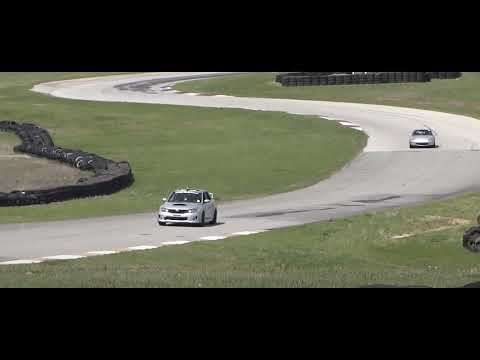

In [3]:
video = YouTubeVideo("XkJCvtCRdVM", width=1024, height=640)
display(video)

In [19]:
video_file_name = "race_car.mp4"


def drawRectangle(frame, bbox):
    p1 = (int(bbox[0]), int(bbox[1])) # Top-left corner of the rectangle
    p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3])) # Bottom-right corner of the rectangle
    cv2.rectangle(frame, p1, p2, (0, 0, 255), 2, 1)


def displayRectangle(frame, bbox):
    plt.figure(figsize=(20, 10))
    frameCopy = frame.copy()  # Copying the one frame of video file into a variable named "frameCopy"
    drawRectangle(frameCopy, bbox)
    frameCopy = cv2.cvtColor(frameCopy, cv2.COLOR_RGB2BGR)
    plt.imshow(frameCopy)
    plt.axis("off")


def drawText(frame, txt, location, color=(50, 170, 50)):
    cv2.putText(frame, txt, location, cv2.FONT_HERSHEY_SIMPLEX, 1, color, 3)

The `bbox` in your `drawRectangle` function stands for "**bounding box**." It is a rectangular box that defines the region of interest (ROI) around an object being tracked or detected in an image or video frame. The bounding box is typically represented as a tuple or list with four elements:

1. x-coordinate of the top-left corner: This defines the horizontal starting point of the rectangle.(bbox[0])
2. y-coordinate of the top-left corner: This defines the vertical starting point of the rectangle.(bbox[1])
3. Width: The width of the rectangle.(bbox[2])
4. Height: The height of the rectangle.(bbox[3])

**Create the Tracker instance**

In [36]:
# Set up tracker
tracker_types = [
    "BOOSTING",
    "MIL",
    "KCF",
    "CSRT",
    "TLD",
    "MEDIANFLOW",
    "GOTURN",
    "MOSSE",
]

# Change the index to change the tracker type
tracker_type = tracker_types[4]  # tracker_type = "KCF"

if tracker_type == "BOOSTING":
    tracker = cv2.legacy.TrackerBoosting.create()
elif tracker_type == "MIL":
    tracker = cv2.legacy.TrackerMIL.create()
elif tracker_type == "KCF":
    tracker = cv2.TrackerKCF.create()
elif tracker_type == "CSRT":
    tracker = cv2.TrackerCSRT.create()
elif tracker_type == "TLD":
    tracker = cv2.legacy.TrackerTLD.create()
elif tracker_type == "MEDIANFLOW":
    tracker = cv2.legacy.TrackerMedianFlow.create()
elif tracker_type == "GOTURN":
    tracker = cv2.TrackerGOTURN.create()
else:
    tracker = cv2.legacy.TrackerMOSSE.create()

**Read input video & Setup output Video**

In [37]:
# Read video
video = cv2.VideoCapture(video_file_name)  # Captures video from video file
ok, frame = video.read()

# Exit if video not opened
if not video.isOpened():
    print("Could not open video")
    sys.exit()
else:
    width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))  #property is used to get or set the width of the video frames.
    height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT)) #property is used to get or set the height of the video frames.

video_output_file_name = "race_car-" + tracker_type + ".mp4"
video_out = cv2.VideoWriter(video_output_file_name, cv2.VideoWriter_fourcc(*"XVID"), 10, (width, height))

video_output_file_name

'race_car-TLD.mp4'

**Define Bounding Box**

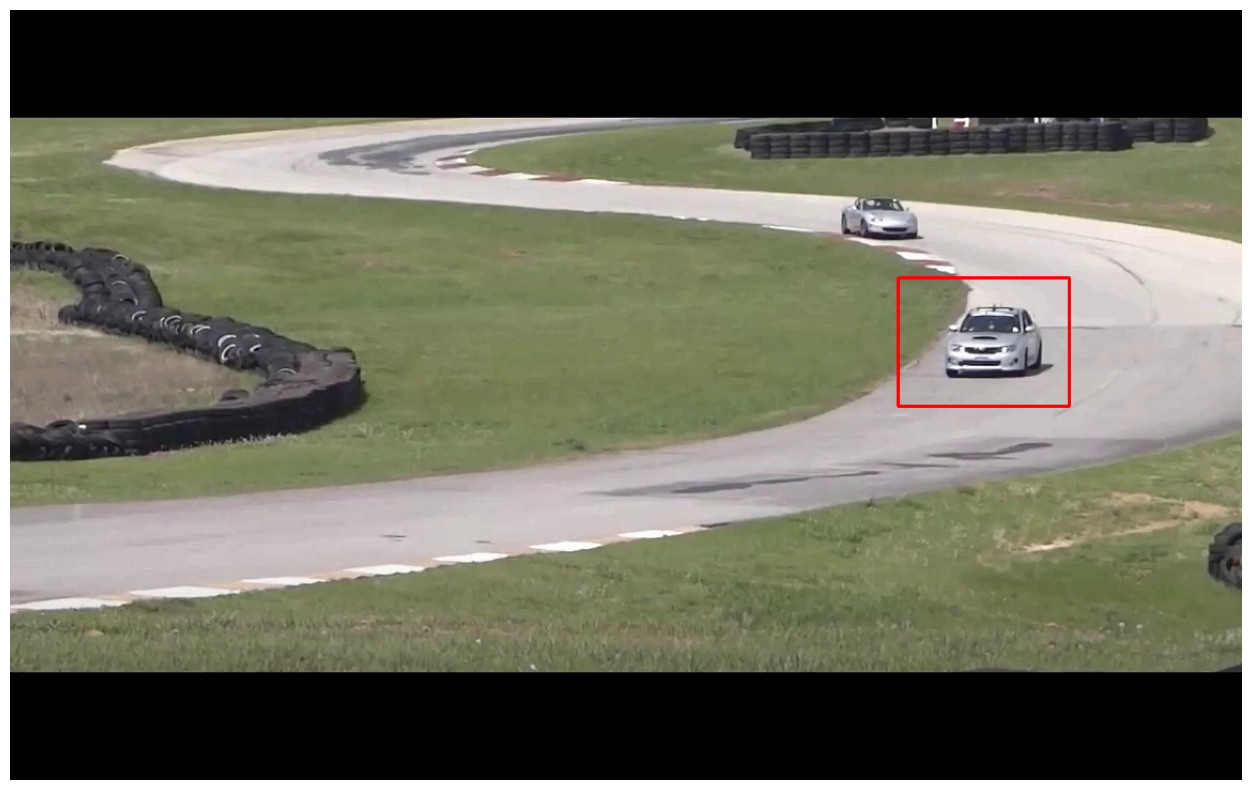

In [38]:
# Define a bounding box
bbox = (830, 250, 160, 120)  # Adjusts bbox according to the image and video
displayRectangle(frame, bbox)

**Intilialize Tracker**
1.   One frame
2. A bounding box




In [39]:
# Initialize tracker with first frame and bounding box

ok = tracker.init(frame, bbox)

**Read frame and Track Object**



In [40]:
while True:
    ok, frame = video.read()

    if not ok:
        break

    # Start timer
    timer = cv2.getTickCount()

    # Update tracker
    ok, bbox = tracker.update(frame)

    # Calculate Frames per second (FPS)
    fps = cv2.getTickFrequency() / (cv2.getTickCount() - timer)

    # Draw bounding box
    if ok:
        drawRectangle(frame, bbox)
    else:
        drawText(frame, "Tracking failure detected", (80, 140), (0, 0, 255))

    # Display Info
    drawText(frame, tracker_type + " Tracker", (80, 60))
    drawText(frame, "FPS : " + str(int(fps)), (80, 100))

    # Write frame to video
    video_out.write(frame)

video.release()
video_out.release()

In [41]:
# Installing ffmpeg
!apt-get -qq install ffmpeg

In [42]:
# Change video encoding of any tracker mp4 file from XVID to h264.
!ffmpeg -y -i {video_output_file_name} -c:v libx264 $"race_car_track_x264.mp4"  -hide_banner -loglevel error

**Render MP4 Video**

In [35]:
# Tracker KCF
mp4 = open("/content/race_car_track_x264.mp4", "rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML(f"""<video width=1024 controls><source src="{data_url}" type="video/mp4"></video>""")

In [43]:
# Tracker TLD
mp4 = open("/content/race_car_track_x264.mp4", "rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML(f"""<video width=1024 controls><source src="{data_url}" type="video/mp4"></video>""")